In [8]:
import os
os.getcwd()


'C:\\Users\\girid'

In [1]:
#pip install tensorflow version==2.17.0

!pip install tensorflow
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
!pip install tensorflow

In [4]:
!pip install matplotlib

  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.0 MB 9.2 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.0 MB 7.7 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.0 MB 7.1 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 7.2 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.0 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------------- -------- 2.1/2.6 MB 10.7 MB/s eta 0:00:01
   ----------------------

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [16]:
import os
print("Current Dir" , os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path = os.path.join(curr_dir,"datasets","Test")
valid_path = os.path.join(curr_dir,"datasets","Valid")

Current Dir d:\Potato-disease-project


In [17]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
     interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [24]:
labels = training_set.class_names
print(labels)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [25]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
     interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [26]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\girid\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.3438 - loss: 1.6028 - val_accuracy: 0.4333 - val_loss: 1.0042
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5064 - loss: 0.9575 - val_accuracy: 0.4933 - val_loss: 0.9980
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6048 - loss: 0.8762 - val_accuracy: 0.6867 - val_loss: 0.7016
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7123 - loss: 0.6275 - val_accuracy: 0.7867 - val_loss: 0.4438
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8107 - loss: 0.4437 - val_accuracy: 0.7433 - val_loss: 0.5637
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8365 - loss: 0.4101 - val_accuracy: 0.9200 - val_loss: 0.2218
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9179 - loss: 0.2195 - val_accuracy: 0.9233 - val_loss: 0.1919
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9176 - loss: 0.2060 - val_accuracy: 0.9100 - val_loss:

In [31]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step - accuracy: 0.9666 - loss: 0.1218
Training accuracy: 0.9577777981758118


In [32]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - accuracy: 0.9337 - loss: 0.1654
Validation accuracy: 0.9300000071525574


In [33]:
cnn.save('trained_plant_disease_model.keras')

In [34]:
training_history.history

{'accuracy': [0.3655555546283722,
  0.5811111330986023,
  0.6511111259460449,
  0.754444420337677,
  0.8199999928474426,
  0.851111114025116,
  0.9200000166893005,
  0.9222221970558167,
  0.903333306312561,
  0.9100000262260437],
 'loss': [1.2763649225234985,
  0.8539408445358276,
  0.7631403207778931,
  0.5545109510421753,
  0.4216410219669342,
  0.3665080964565277,
  0.2200080305337906,
  0.20263464748859406,
  0.23266305029392242,
  0.22080612182617188],
 'val_accuracy': [0.4333333373069763,
  0.4933333396911621,
  0.6866666674613953,
  0.7866666913032532,
  0.7433333396911621,
  0.9200000166893005,
  0.9233333468437195,
  0.9100000262260437,
  0.8633333444595337,
  0.9300000071525574],
 'val_loss': [1.004203200340271,
  0.9980244040489197,
  0.7015964984893799,
  0.44384679198265076,
  0.5636653900146484,
  0.22184886038303375,
  0.1919041872024536,
  0.23652490973472595,
  0.37271848320961,
  0.1825495809316635]}

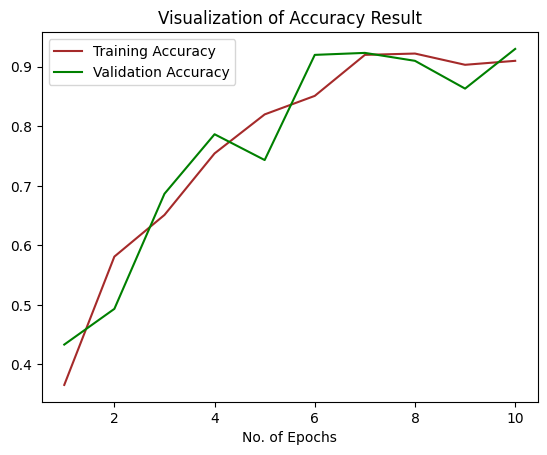

In [35]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()